# Supermarket Customer Segmentation

## Preparation

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

### Load Dataset

In [ ]:
df= pd.read_csv('/content/Drive/MyDrive/dibimbing/Special Class 7/HW_data/ECommerce_consumer behaviour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


## Data Cleaning

### Handling Missing Value

In [ ]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [ ]:
df = df.dropna()

### Handling Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Build Dataset

In [ ]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
22,1201011,147243,14,0,16,3.0,94,1,0,7,beverages,tea
23,1201011,147243,14,0,16,3.0,83,2,0,4,produce,fresh vegetables
24,1201011,147243,14,0,16,3.0,83,3,1,4,produce,fresh vegetables
25,1201011,147243,14,0,16,3.0,24,4,1,4,produce,fresh fruits
26,1201011,147243,14,0,16,3.0,120,5,1,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [ ]:
rfm = df.groupby('user_id').agg(frequency = ('order_number','max'),
                                recency = ('days_since_prior_order', 'min'),
                                monetary = ('add_to_cart_order', 'sum')).reset_index()
rfm

,user_id,frequency,recency,monetary
0,2,3,3.0,36
1,3,11,9.0,75
2,7,3,30.0,300
3,10,4,14.0,465
4,11,5,30.0,66
...,...,...,...,...
98913,206204,2,11.0,210
98914,206205,3,10.0,28
98915,206206,52,0.0,47
98916,206208,48,5.0,207


## Data Understanding

#### Statistical Summary

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [ ]:
df[numerical].describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06
mean,1.707264e+06,1.030471e+05,1.821107e+01,2.735071e+00,1.342840e+01,1.138603e+01,7.119710e+01,8.365059e+00,6.284359e-01,9.931839e+00
std,9.861375e+05,5.946256e+04,1.758028e+01,2.092352e+00,4.243730e+00,8.970980e+00,3.821248e+01,7.158381e+00,4.832229e-01,6.283028e+00
min,1.000000e+01,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526620e+05,5.162500e+04,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705092e+06,1.026170e+05,1.200000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.560343e+06,1.545240e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [ ]:
df[categorical].describe()

,department,product_name
count,1895159,1895159
unique,21,134
top,produce,fresh fruits
freq,553916,213224


#### Univariate Analysis

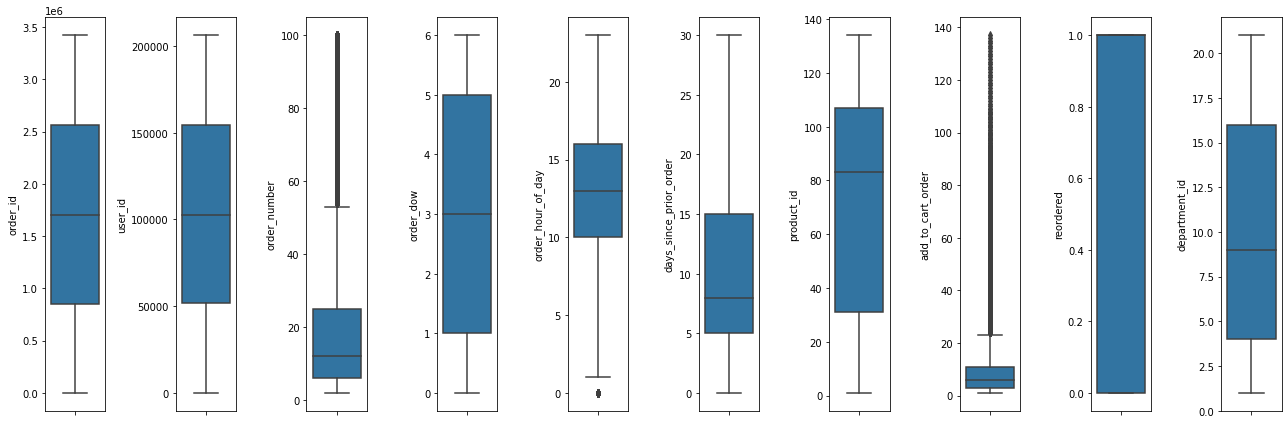

In [ ]:
plt.figure(figsize=(18,6))
for i in range(0, len(numerical)):
  plt.subplot(1, len(numerical), i+1)
  sns.boxplot(y = df[numerical[i]])
  plt.tight_layout()

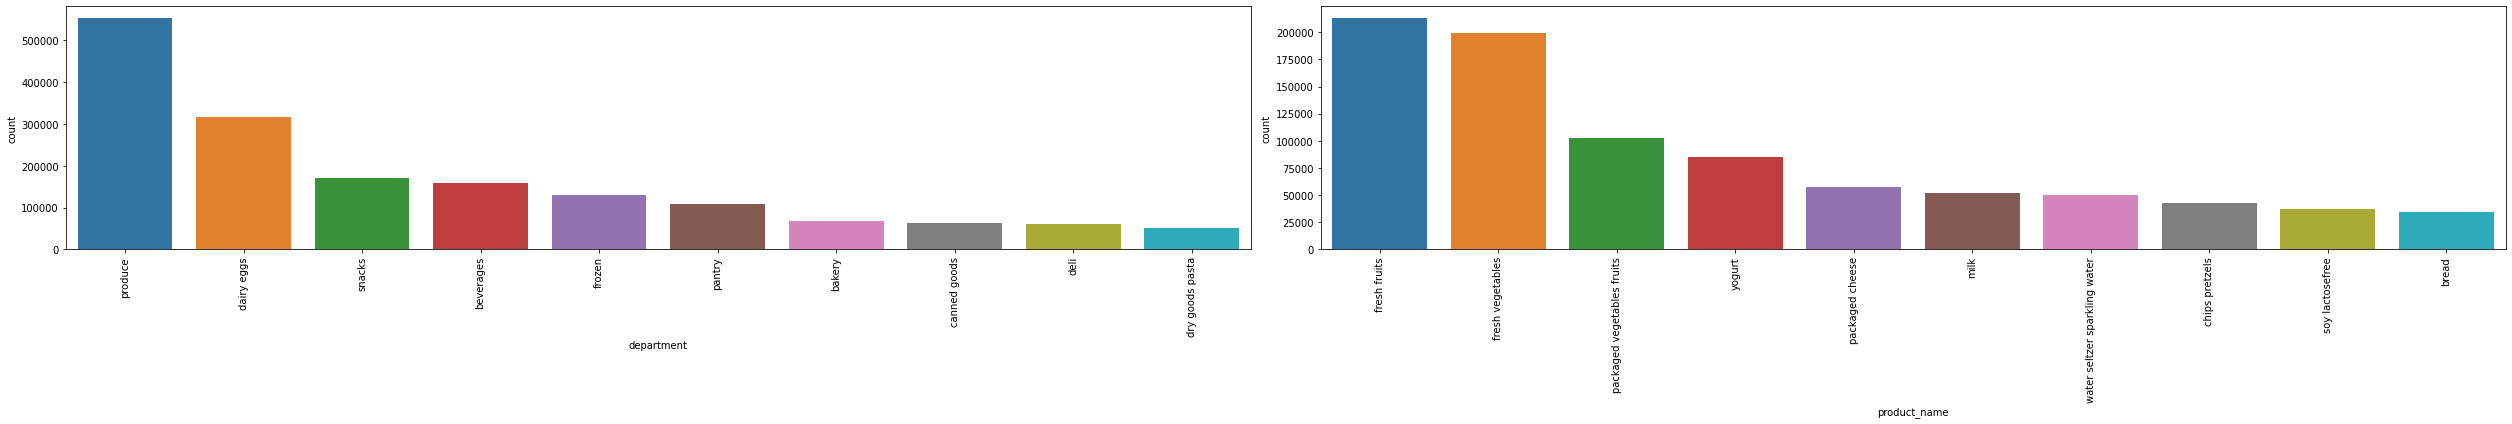

In [ ]:
plt.figure(figsize=(35,6))
for i in range(0, len(categorical)):
  plt.subplot(1, len(categorical), i+1)
  sns.countplot(x = df[categorical[i]], order=df[categorical[i]].value_counts().head(10).index)
  plt.xticks(rotation=90)
  plt.tight_layout()

#### Multivariate Analysis

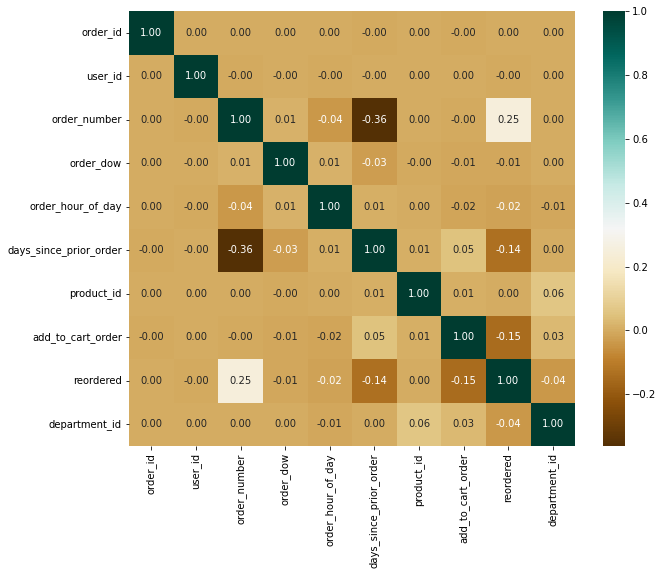

In [ ]:
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BrBG');

The data and outlier seems reasonable, so don't drop any data

Most departement get order:
1. produce
2. dairy egg
3. snacks
4. beverages
5. frozen

Most product order:
1. fresh fruits
2. fresh vegetables
3. packaged vegetables and fruits
4. yogurt
5. packages cheese


## Modeling

### Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(rfm)

In [ ]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=2).fit_transform(X_std)
rfm_tsne = pd.DataFrame(Xtsne)
rfm_tsne.columns = ['x1','x2']
rfm_tsne.head()

,x1,x2
0,12.945822,-117.166710
1,-26.462765,-101.681061
2,-74.986877,-32.069592
3,45.195469,-35.271832
4,-75.657738,-78.930290


### Determining the Number of Cluster

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: >

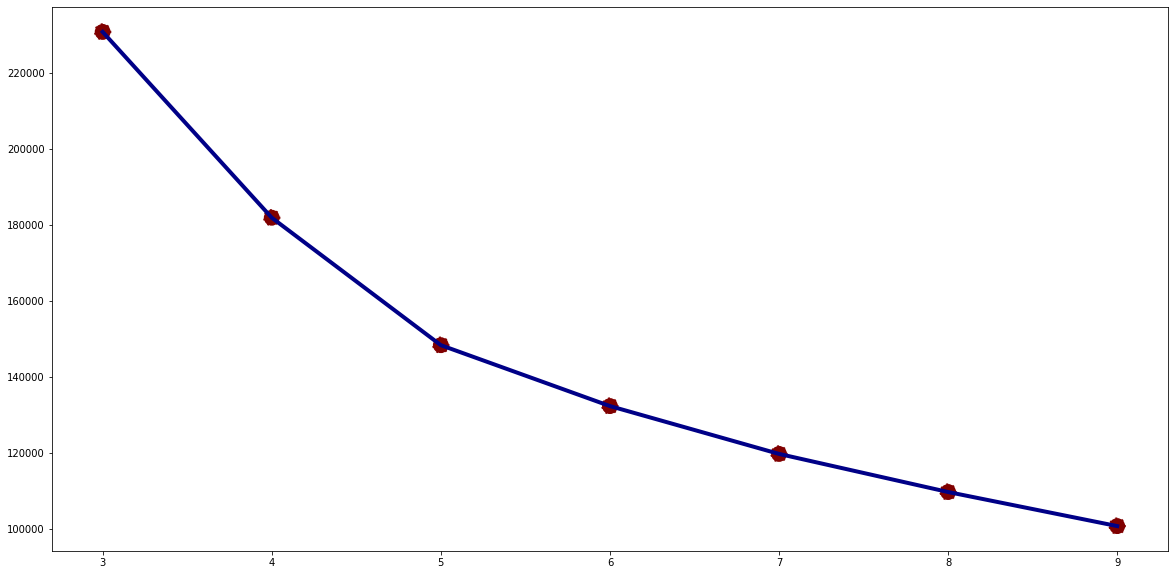

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(3, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(3, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(3, 10), y=inertia, s=300, color='#800000',  linestyle='--')


In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(3,10))
print(range_n_clusters)

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(X_std)
    preds = kmeans.predict(X_std)
     
    score_euclidean = silhouette_score(X_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

[3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: >

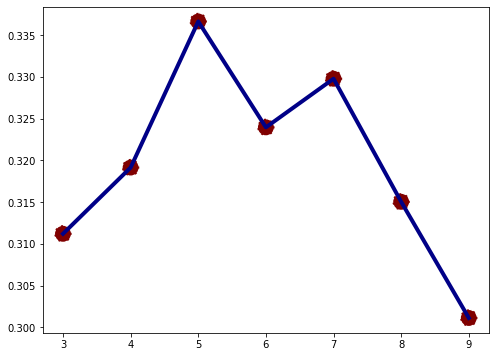

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(3,10), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(3,10), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

### Clustering (n=5)

In [ ]:
n_clusters = 5

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_std)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [ ]:
rfm['clusters'] = kmeans.labels_
rfm.head()

,user_id,frequency,recency,monetary,clusters
0,2,3,3.0,36,0
1,3,11,9.0,75,0
2,7,3,30.0,300,3
3,10,4,14.0,465,0
4,11,5,30.0,66,3


In [ ]:
rfm['aov'] = rfm['monetary']/rfm['frequency']

In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
rfm.describe(percentiles=perc)

,user_id,frequency,recency,monetary,clusters,aov
count,98918.000000,98918.000000,98918.000000,98918.00000,98918.000000,98918.000000
mean,103279.204948,17.067349,11.219010,160.26524,1.529600,15.336408
std,59550.572270,17.676354,9.668739,281.43542,1.228665,30.136709
min,2.000000,2.000000,0.000000,1.00000,0.000000,0.014706
10%,20765.100000,3.000000,2.000000,6.00000,0.000000,0.666667
20%,41418.200000,4.000000,3.000000,15.00000,0.000000,1.500000
30%,62140.100000,6.000000,5.000000,28.00000,0.000000,2.571429
40%,82649.800000,8.000000,6.000000,45.00000,1.000000,4.025641
50%,103233.500000,11.000000,7.000000,66.00000,2.000000,6.000000
60%,123770.000000,14.000000,10.000000,105.00000,2.000000,9.000000


In [ ]:
rfm.groupby('clusters').agg({
                            'recency' : ['mean', 'std'],
                            'frequency' : ['mean', 'std'],
                            'monetary' : ['mean', 'std'],
                            'aov' : ['mean', 'std']
    
})

recency            frequency                monetary              \
               mean       std       mean        std         mean         std   
clusters                                                                       
0          7.491938  4.693806  13.191390   9.155911   116.948240  140.159393   
1          2.668224  2.276047  55.263948  17.249385   247.963974  203.781443   
2          7.436744  4.687075  13.090116   9.179519   114.839410  139.363884   
3         27.268968  4.009280   6.576611   4.750885    87.867039  124.475302   
4          6.034926  5.353684  33.492257  21.391049  1277.767381  746.580494   

                aov             
               mean        std  
clusters                        
0         13.614933  23.432075  
1          4.848091   4.322937  
2         13.419707  23.120922  
3         18.974273  32.038966  
4         65.639640  88.586710

Cluster 0 dan 2 cenderung tidak memiliki perbedaan yang signifikan

### Clustering (n=4)

In [ ]:
n_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_std)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
rfm['clusters'] = kmeans.labels_
rfm.head()

,user_id,frequency,recency,monetary,clusters,aov
0,2,3,3.0,36,0,12.000000
1,3,11,9.0,75,0,6.818182
2,7,3,30.0,300,2,100.000000
3,10,4,14.0,465,0,116.250000
4,11,5,30.0,66,2,13.200000


In [ ]:
rfm['aov'] = rfm['monetary']/rfm['frequency']

In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
rfm.describe(percentiles=perc)

,user_id,frequency,recency,monetary,clusters,aov
count,98918.000000,98918.000000,98918.000000,98918.00000,98918.000000,98918.000000
mean,103279.204948,17.067349,11.219010,160.26524,1.135890,15.336408
std,59550.572270,17.676354,9.668739,281.43542,1.008939,30.136709
min,2.000000,2.000000,0.000000,1.00000,0.000000,0.014706
10%,20765.100000,3.000000,2.000000,6.00000,0.000000,0.666667
20%,41418.200000,4.000000,3.000000,15.00000,0.000000,1.500000
30%,62140.100000,6.000000,5.000000,28.00000,0.000000,2.571429
40%,82649.800000,8.000000,6.000000,45.00000,1.000000,4.025641
50%,103233.500000,11.000000,7.000000,66.00000,1.000000,6.000000
60%,123770.000000,14.000000,10.000000,105.00000,1.000000,9.000000


In [ ]:
rfm.groupby('clusters').agg({
                            'recency' : ['mean', 'std'],
                            'frequency' : ['mean', 'std'],
                            'monetary' : ['mean', 'std'],
                            'aov' : ['mean', 'std']
    
})

recency            frequency               monetary              \
               mean       std       mean        std        mean         std   
clusters                                                                      
0          7.311958  4.652749  14.147679  10.355290  116.060160  141.260036   
1          7.322683  4.667526  13.837255  10.204778  114.427201  142.419955   
2         27.182746  4.085860   6.570557   4.735952   91.767696  139.046095   
3          3.138979  2.921797  52.887085  20.623046  528.995753  593.949588   

                aov             
               mean        std  
clusters                        
0         13.478609  24.303826  
1         13.602631  25.847052  
2         19.844350  36.100470  
3         16.809022  40.474036

Cluster 0 dan 1 cenderung tidak memiliki perbedaan yang signifikan

### Clustering (n=3)

In [ ]:
n_clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_std)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
rfm['clusters'] = kmeans.labels_
rfm.head()

,user_id,frequency,recency,monetary,clusters
0,2,3,3.0,36,1
1,3,11,9.0,75,1
2,7,3,30.0,300,2
3,10,4,14.0,465,1
4,11,5,30.0,66,2


In [ ]:
rfm['aov'] = rfm['monetary']/rfm['frequency']

In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
rfm.describe(percentiles=perc)

,user_id,frequency,recency,monetary,clusters,aov
count,98918.000000,98918.000000,98918.000000,98918.00000,98918.000000,98918.000000
mean,103279.204948,17.067349,11.219010,160.26524,1.094745,15.336408
std,59550.572270,17.676354,9.668739,281.43542,0.624082,30.136709
min,2.000000,2.000000,0.000000,1.00000,0.000000,0.014706
10%,20765.100000,3.000000,2.000000,6.00000,0.000000,0.666667
20%,41418.200000,4.000000,3.000000,15.00000,1.000000,1.500000
30%,62140.100000,6.000000,5.000000,28.00000,1.000000,2.571429
40%,82649.800000,8.000000,6.000000,45.00000,1.000000,4.025641
50%,103233.500000,11.000000,7.000000,66.00000,1.000000,6.000000
60%,123770.000000,14.000000,10.000000,105.00000,1.000000,9.000000


In [ ]:
rfm.groupby('clusters').agg({
                            'recency' : ['mean', 'std'],
                            'frequency' : ['mean', 'std'],
                            'monetary' : ['mean', 'std'],
                            'aov' : ['mean', 'std']
    
})

recency            frequency               monetary              \
               mean       std       mean        std        mean         std   
clusters                                                                      
0          3.372545  2.968423  49.370681  20.203001  478.607816  551.088022   
1          7.004756  4.163615  13.143805   9.172460  107.575558  129.221131   
2         26.330997  4.666060   6.746280   4.881318   92.763211  140.437785   

                aov             
               mean        std  
clusters                        
0         16.135077  38.523570  
1         13.343329  24.237967  
2         19.706491  36.151857

### Cluster Visualization

In [ ]:
rfm_tsne = pd.concat([rfm['clusters'], pd.DataFrame(Xtsne)], axis=1)

<ipython-input-14-924dc5b9ed2a>:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='0', ylabel='1'>

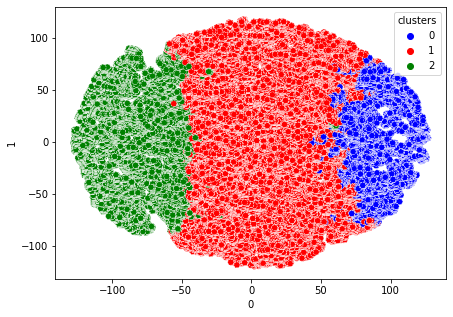

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(
    x=rfm_tsne[0], y=rfm_tsne[1],
    hue="clusters",
    palette=['blue','red','green','black','pink','orange'],
    linestyle='--',
    data=rfm_tsne,
    ax=ax
)

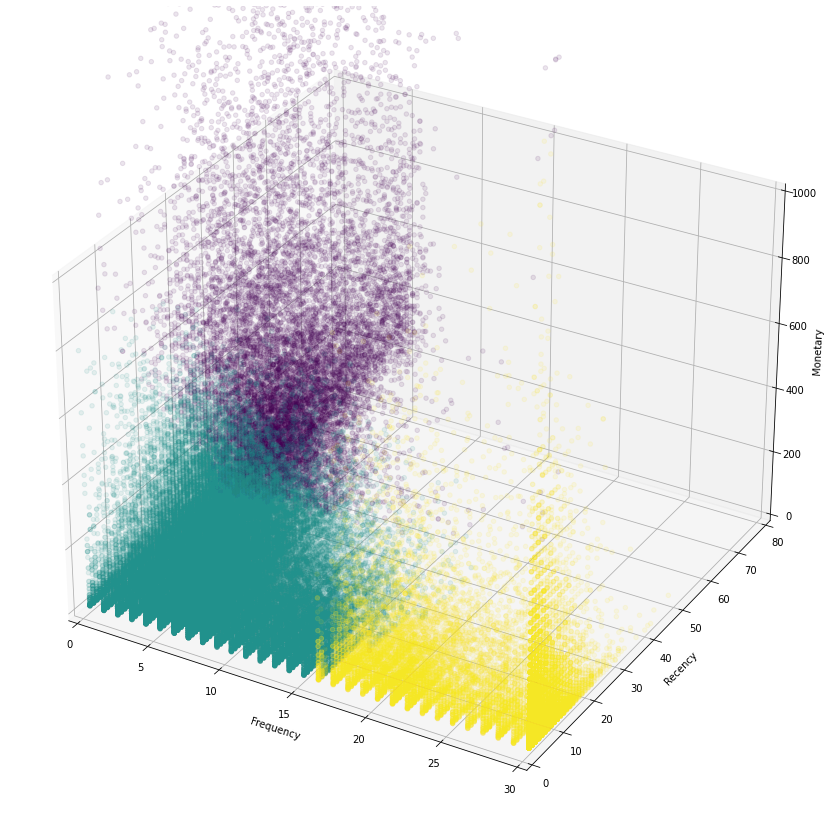

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a scatter plot
ax.scatter(rfm['recency'], rfm['frequency'], rfm['monetary'], c=rfm['clusters'], alpha = 0.1)

# Set the axis labels
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')

ax.set_xlim([0, 30])
ax.set_ylim([0, 80])
ax.set_zlim([0, 1000])

# Show the plot
plt.show()